In [1]:
import numpy as np # 
import pandas as pd # index, columns 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import KNNImputer

plt.rcParams["figure.figsize"] = (16,10)

In [2]:
data = pd.read_csv("california_housing_train.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## BOX PLOT

<AxesSubplot:xlabel='median_house_value'>

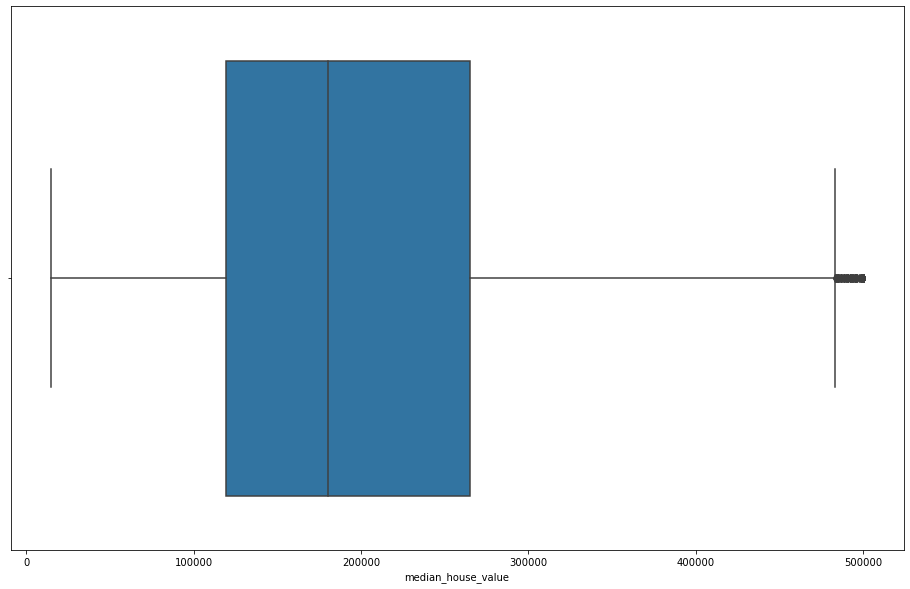

In [3]:
sns.boxplot(x = 'median_house_value', data = data)

In [4]:
# median - 50 quantile 
# low box - 25 quantile 
# high box - 75 quantile 
# low line - 0 quantile (excluding outliers)
# low line - 100 quantile (excluding outliers)

# Z Score 
#### Outlier if < mean - 3*std or > mean + 3*std 

In [5]:
def DetectOutlier_Zscore(data, col):
    mean, std = data[col].mean(), data[col].std()
    high_threshold, low_threshold = mean + 3*std , mean - 3*std 
    higher_outliers, lower_outlier = data[col] > high_threshold, data[col] < low_threshold
    plt.plot(data[col])
    plt.plot([high_threshold]*data.shape[0])
    plt.plot([low_threshold]*data.shape[0])
    plt.show()
    return np.where(np.logical_or(higher_outliers, lower_outlier))[0], high_threshold, low_threshold

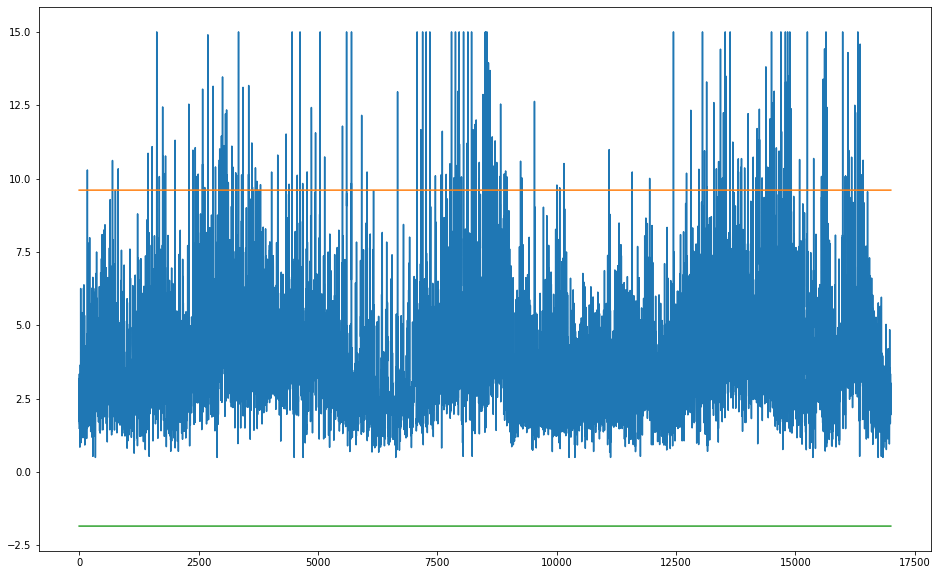

 N outlier Acc to Z Score :  286


In [6]:
idx, high, low = DetectOutlier_Zscore(data = data, col = 'median_income')
print(" N outlier Acc to Z Score : ", len(idx))

# IQR

In [7]:
# IQR - Inter Quartile range 
# Outlier if < q1 - 1.5(q3 - q1) or > q3 + 1.5(q3 - q1)

# q3 -> 75 quantile 
# q1 -> 25 quantile 

def DetectOutlier_IQR(data, col):
    q3, q1 = data[col].quantile(0.75), data[col].quantile(0.25)
    high_threshold, low_threshold = q3 + 1.5*(q3 - q1) , q1 - 1.5*(q3 - q1) 
    higher_outliers, lower_outlier = data[col] > high_threshold, data[col] < low_threshold
    plt.plot(data[col])
    plt.plot([high_threshold]*data.shape[0])
    plt.plot([low_threshold]*data.shape[0])
    plt.show()
    return np.where(np.logical_or(higher_outliers, lower_outlier))[0], high_threshold, low_threshold

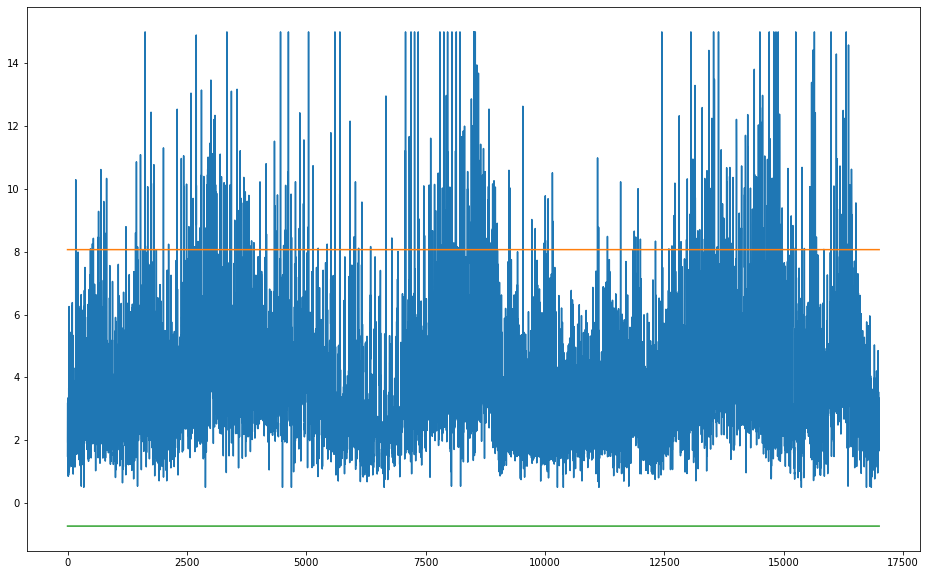

 N outlier Acc to IQR :  563


In [8]:
idx, high, low = DetectOutlier_IQR(data = data, col = 'median_income')
print(" N outlier Acc to IQR : ", len(idx))

# Detection -> done 
# How to Handle ? 
#     a. Impractical - Clip 
#     b. practical - Impute
#     c. remove - 

# C)Remove -  Not Recommended 

In [9]:
tmpData = data.copy()
print(" Previous Data shape ", tmpData.shape)
tmpData.drop(idx, axis = 0, inplace = True)
print(" After Dropping Outlier Data shape ", tmpData.shape)

 Previous Data shape  (17000, 9)
 After Dropping Outlier Data shape  (16437, 9)


In [10]:
data['median_income'].min(), data['median_income'].max()

(0.4999, 15.0001)

# a)Cliping- Not recommended

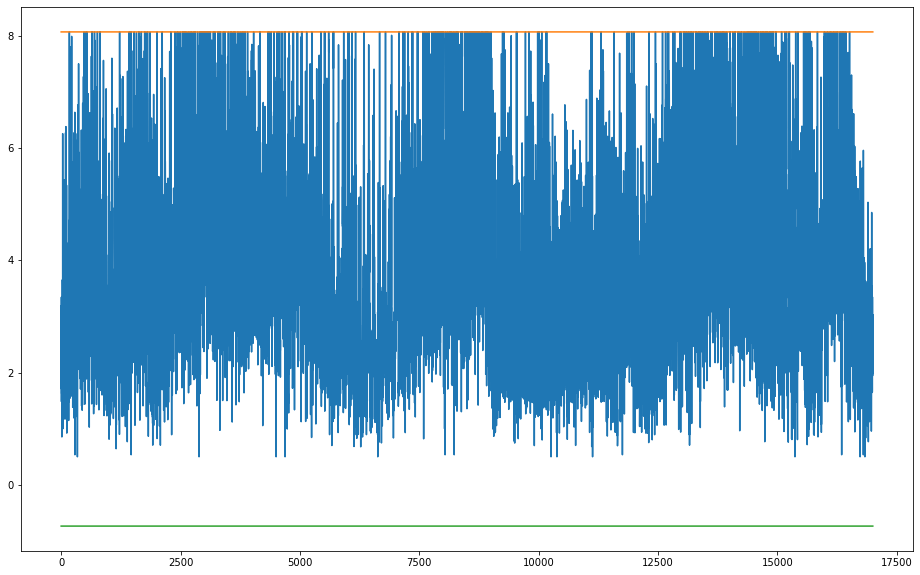

In [11]:
# Impractical - Data collection or Data manipulated 
tmpData = data.copy()
tmpData['median_income'] = np.clip(tmpData['median_income'], low, high)
plt.plot(tmpData['median_income'])
plt.plot([high]*data.shape[0])
plt.plot([low]*data.shape[0])
plt.show()

# By using KNN Imputer-recommended

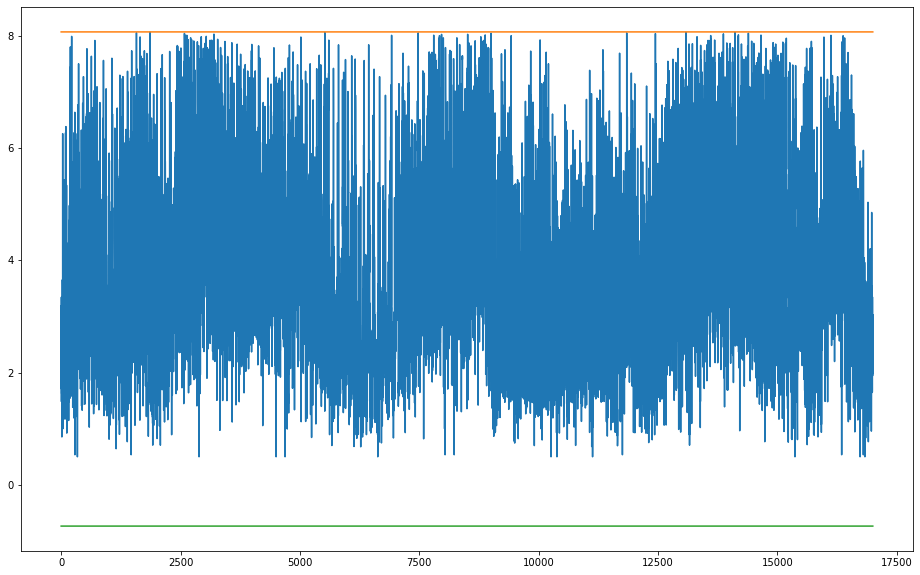

In [12]:
# Practical - not manipulated data , rare event 
 # replace outliers with Nans 
 # Apply KNN or Iterative Imputer 

tmpData = data.copy()
columns = tmpData.columns
tmpData.loc[idx, 'median_income'] = np.nan
imputer = KNNImputer()
tmpData = imputer.fit_transform(tmpData)

tmpData = pd.DataFrame(tmpData, columns = columns)

# KNN imputer 
plt.plot(tmpData['median_income'])
plt.plot([high]*data.shape[0])
plt.plot([low]*data.shape[0])
plt.show()